In [43]:
#Importing libraries
import numpy as np 
import pandas as pd 
import io
import matplotlib.pyplot as plt

In [44]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file

data = pd.read_csv('./BuyComputer.csv')

data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [45]:
#Declare label as last column in the source file
Y = data.iloc[:,-1]

In [46]:
#Declaring X as all columns excluding last
X = data.iloc[:,:2]

In [47]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=136,test_size=0.3)

In [48]:
# Sacaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(X_train[0])
w = []
b = 0.2
print(len_x)

2


In [50]:
entries = len(X_train[:,0])
entries

280

In [51]:
for weights in range(len_x):
    w.append([0])
w=np.array(w,dtype='float64')
w

array([[0.],
       [0.]])

In [52]:
# Sigmoid function
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [53]:
def predict(inputs):
    return np.matmul(inputs,w)+b
def h(inputs):
    return sigmoid(predict(inputs))

In [54]:
#Loss function
def loss_func(y,a):
    J = a*np.log(y)+(1-a)*np.log(1-y)
    return -np.mean(J)

def gradient_descend(lr):
    tmp = h(X_train)
    for i in range(0,len_x):
        w[i]-=lr*np.sum((tmp.flatten()-y_train)*X_train[:,i])
    
    global b
    b-=lr*np.sum(tmp.flatten()-y_train)
    y_ = h(X_train)
    y_ = y_.flatten()

    return loss_func(y_,np.array(y_train))

In [55]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range(len_x):
    dw.append(0)

In [56]:
#Repeating the process 3000 times
# tmp=h(X_train)
# tmp.flatten()-y_train
error=[]
for i in range(0,3000):
    error.append(gradient_descend(lr=alpha))


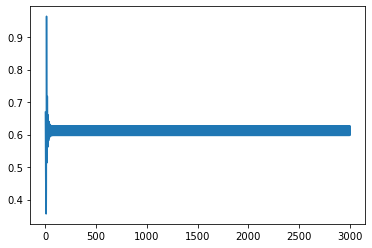

In [57]:
plt.plot(error)

In [287]:
#Print weight
w

array([[103443.9688565],
       [ 61213.6596302]])

In [288]:
#print bias
b

-53827.31283114483

In [291]:
#predicting the label
y_ = h(X_test)
y_ = y_.flatten()
y_predicted = (y_ >= .5).astype(int)
y_predicted

<ipython-input-282-c1d79a588ee8>:3: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-z))


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [292]:
#print actual and predicted values in a table
y_test

268    1
222    1
53     0
252    1
213    0
      ..
84     0
49     0
257    0
304    0
301    1
Name: Purchased, Length: 120, dtype: int64

In [294]:
# Calculating accuracy of prediction
np.sum(y_predicted == y_test)/len(X_test)

0.8583333333333333

In [295]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[75,  4],
       [13, 28]], dtype=int64)

#Using sklearn LogisticRegression model

In [298]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)

#Fit
LR.fit(X_train,y_train)

#predicting the test label with LR. Predict always takes X as input
y_predicted = LR.predict(X_test)

In [299]:
confusion_matrix(y_test, y_predicted)

array([[73,  6],
       [12, 29]], dtype=int64)

**Exercise:**

Try logistic regression on BuyComputer dataset and set Random state=Your_RollNumber (last 3 digit of ID, incase if you don't have ID)